## 1. 가설 설정
- 지역적 특징이 상권변화지표에 영향을 줄 것이다.

## 2. 가설설정 배경
- 상권변화지표
    - HH(정체)
        - 상권 사업체의 평균 영업기간 > 현재 '생존'중인 사업체의 평균 영업기간
        - 상권 사업체의 평균 영업기간 > 현재 '폐업'한 사업체의 평균 영업기간
        - 신규사업 진출(창업)이 어려운 레드오션
    - HL(상권축소)
        - 상권 사업체의 평균 영업기간 > 현재 '생존'중인 사업체의 평균 영업기간
        - 상권 사업체의 평균 영업기간 < 현재 '폐업'한 사업체의 평균 영업기간
        - 기존 업체가 경쟁력을 가지는 시장
    - LH(상권확장)
        - 상권 사업체의 평균 영업기간 < 현재 '생존'중인 사업체의 평균 영업기간
        - 상권 사업체의 평균 영업기간 > 현재 '폐업'한 사업체의 평균 영업기간
        - 신규 업체가 경쟁력을 가지는 시장
    - LL(다이나믹)
        - 상권 사업체의 평균 영업기간 < 현재 '생존'중인 사업체의 평균 영업기간
        - 상권 사업체의 평균 영업기간 < 현재 '폐업'한 사업체의 평균 영업기간
        - 도시 재생 및 신규 개발 상권

## 3. 분석 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 상권변화지표 데이터
df_variation = pd.read_csv('variation_byunit.csv', encoding = 'cp949')

In [3]:
df_variation

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2023,1,11740,강동구,LL,다이나믹,98,49,104,52
1,2023,1,11710,송파구,LL,다이나믹,102,49,104,52
2,2023,1,11680,강남구,LL,다이나믹,99,48,104,52
3,2023,1,11650,서초구,HH,정체,114,53,104,52
4,2023,1,11620,관악구,LL,다이나믹,99,49,104,52
...,...,...,...,...,...,...,...,...,...,...
920,2014,1,11215,광진구,LL,다이나믹,89,44,92,45
921,2014,1,11200,성동구,HH,정체,94,48,92,45
922,2014,1,11170,용산구,HH,정체,100,49,92,45
923,2014,1,11140,중구,HH,정체,107,52,92,45


In [4]:
# 결측치 확인
df_variation.isnull().sum()

기준_년_코드           0
기준_분기_코드          0
시군구_코드            0
시군구_코드_명          0
상권_변화_지표          0
상권_변화_지표_명        0
운영_영업_개월_평균       0
폐업_영업_개월_평균       0
서울_운영_영업_개월_평균    0
서울_폐업_영업_개월_평균    0
dtype: int64

In [5]:
# 년도와 시군구 코드, 상권변화지표에 대한 컬럼명 변경
df_variation.rename(columns = {'기준_년_코드' : 'year', '시군구_코드' : 'area', '시군구_코드_명' : 'area_k', '상권_변화_지표' : 'variation'}, inplace = True)

## 4. 분석 컬럼
- 기준년 코드(year)
- 시군구 코드(area)
- 시군구 코드명(area_k)
- 상권변화지표(variation)

In [6]:
# 필요한 컬럼만 추출하여 새로운 데이터프레임으로 저장
df_var = df_variation[['year', 'area', 'area_k', 'variation']]
df_var

,year,area,area_k,variation
0,2023,11740,강동구,LL
1,2023,11710,송파구,LL
2,2023,11680,강남구,LL
3,2023,11650,서초구,HH
4,2023,11620,관악구,LL
...,...,...,...,...
920,2014,11215,광진구,LL
921,2014,11200,성동구,HH
922,2014,11170,용산구,HH
923,2014,11140,중구,HH


## 5. 분석방법
- 최근의 상권변화를 확인하기 위해 2022,2023년도 데이터만 추출
- 이후 각 년도의 상권발달지표(HHLL) 별로 데이터 개수 카운팅.

In [7]:
# 최근의 상권변화를 확인하기 위해 2022,2023년도 데이터를 확인
df_2022 = df_var[df_var['year']==2022]
result_1 = df_2022['variation'].value_counts().to_frame()

## 6.1. 분석 1
- 22년도 1~4분기 25개 자치구의 HHLL 지표 카운팅
- 23년도 1분기 25개 자치구의 HHLL 지표 카운팅

Text(0.5, 1.0, '<2022 Distribution of change indicators>')

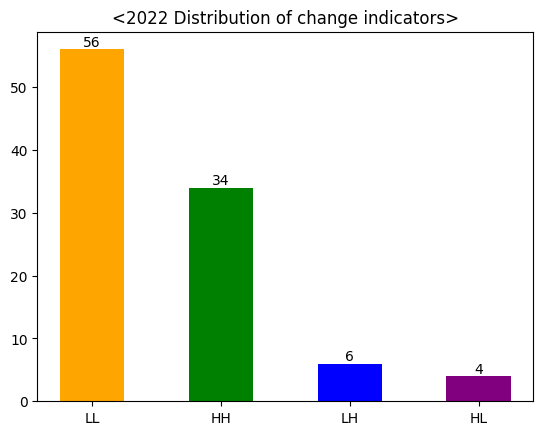

In [8]:
y = result_1['variation'].to_list()
plt.bar(result_1.index, result_1['variation'], width=0.5, color = ['orange', 'green', 'blue', 'purple'] )
for i in range(len(y)):
    plt.text(result_1.index[i], y[i], y[i], ha='center', va='bottom')
plt.title('<2022 Distribution of change indicators>')

In [9]:
df_2023 = df_var[df_var['year']==2023]
result_2 = df_2023['variation'].value_counts().to_frame()

Text(0.5, 1.0, '<2023 Distribution of change indicators>')

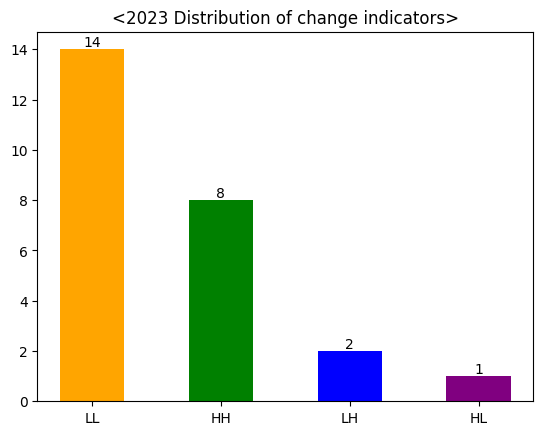

In [10]:
y2 = result_2['variation'].to_list()
plt.bar(result_2.index, result_2['variation'], width=0.5, color = ['orange', 'green', 'blue', 'purple'] )
for i in range(len(y2)):
    plt.text(result_2.index[i], y2[i], y2[i], ha='center', va='bottom')
plt.title('<2023 Distribution of change indicators>')

## 6.2. 분석 1 결과
- 22,23년도 모두 LL이 56%로 가장 비중이 높다.
    - 22년도의 경우 25개 자치구의 1~4분기 데이터 100개 중 56개가 LL
    - 23년도의 경우에는 1분기밖에 없어서 총 데이터 개수가 25개.
        - 그 중 14개가 LL이므로 22년도와 LL비율은 동일.

## 7.1. 분석 2
- 각 상권변화지표(HHLL)을 기록한 구 확인
    - 연도별로도 확인하여 각 자치구의 지표 변화 파악

### 7.1.1. LH 지표를 기록한 구 확인
- 22년도(4개 분기)
    - 4회(100%) : 성동구
    - 2회(50%) : 성북구
- 23년도(1개 분기)
    - 1회(100%) : 성북구, 성동구
    
### - 성동구와 성북구만이 LH를 기록한다.
- 단, 성북구는 1,2분기엔 LH였으나 3분기부터는 LH에서 이탈했다.

In [11]:
# 상권 변화 지표 'LH'를 기록한 구 확인(22년도)
df_2022[df_2022['variation']=='LH']

,year,area,area_k,variation
42,2022,11290,성북구,LH
46,2022,11200,성동구,LH
67,2022,11290,성북구,LH
71,2022,11200,성동구,LH
96,2022,11200,성동구,LH
121,2022,11200,성동구,LH


In [12]:
df_2023[df_2023['variation']=='LH']
# 22,23년 'LH' 지표를 기록한 구는 성북구, 성동구만 존재함.

,year,area,area_k,variation
17,2023,11290,성북구,LH
21,2023,11200,성동구,LH


### 7.1.2. HL 지표를 기록한 구 확인
- 22년도(4개 분기)
    - 4회(100%) : 구로구
- 23년도(1개 분기)
    - 1회(100%) : 구로구
    
### - HL은 구로구가 유일하다.

In [13]:
df_2022[df_2022['variation']=='HL']

,year,area,area_k,variation
33,2022,11530,구로구,HL
58,2022,11530,구로구,HL
83,2022,11530,구로구,HL
108,2022,11530,구로구,HL


In [14]:
df_2023[df_2023['variation']=='HL']

,year,area,area_k,variation
8,2023,11530,구로구,HL


### 7.1.3. HH 지표를 기록한 구 확인
- 22년도(4개 분기)
    - 4회(100%) : 동대문, 동작, 서대문, 서초, 영등포, 용산, 종로, 중구
    - 2회(50%) : 성북구
- 23년도(1개 분기)
    - 1회(100%) : 동대문, 동작, 서대문, 서초 ,영등포, 용산, 종로, 중구

### - 성북구는 HH과 HL을 오간다.
- 7.1.1을 보면 22년도 1,2분기에 HL이던 성북구가 3,4분기에 HH로 이동했음을 알 수 있다.
    - 이후 23년도 1분기엔 다시 HH로 돌아왔다.

In [15]:
df_2022[df_2022['variation']=='HH'].groupby('area_k')['area_k'].count().to_frame()

,area_k
area_k,
동대문구,4
동작구,4
서대문구,4
서초구,4
성북구,2
영등포구,4
용산구,4
종로구,4
중구,4


In [16]:
df_2023[df_2023['variation']=='HH']

,year,area,area_k,variation
3,2023,11650,서초구,HH
5,2023,11590,동작구,HH
6,2023,11560,영등포구,HH
12,2023,11410,서대문구,HH
19,2023,11230,동대문구,HH
22,2023,11170,용산구,HH
23,2023,11140,중구,HH
24,2023,11110,종로구,HH


### 7.1.4. LL 지표를 기록한 구 확인
- 22년도(4개 분기)
    - 4회(100%) : 강동, 송파, 강남, 관악, 금천, 강서, 양천, 마포, 은평, 노원, 도봉, 강북, 중랑, 광진
- 23년도(1개 분기)
    - 1회(100%) : 강동, 송파, 강남, 관악, 금천, 강서, 양천, 마포, 은평, 노원, 도봉, 강북, 중랑, 광진

### - 과반수의 자치구가 LL로 분류된다.
- 또한 해당 자치구들은 LL에서 이탈하지 않는다.

In [17]:
df_2022[df_2022['variation']=='LL'].groupby('area_k')['area_k'].count().to_frame()

,area_k
area_k,
강남구,4
강동구,4
강북구,4
강서구,4
관악구,4
광진구,4
금천구,4
노원구,4
도봉구,4


In [18]:
df_2023[df_2023['variation']=='LL']

,year,area,area_k,variation
0,2023,11740,강동구,LL
1,2023,11710,송파구,LL
2,2023,11680,강남구,LL
4,2023,11620,관악구,LL
7,2023,11545,금천구,LL
9,2023,11500,강서구,LL
10,2023,11470,양천구,LL
11,2023,11440,마포구,LL
13,2023,11380,은평구,LL
14,2023,11350,노원구,LL


## 7.2. 분석 2 결과
- LL(다이나믹)
    - 과반수의 자치구(25개 중 14개)가 여기에 속한다.
    - 이들은 22, 23년도 내내 HHLL지표 변동이 없다.
- HL(상권축소)
    - 구로구가 유일하다. 또한 22,23년도 내내 지표 변동이 없다.
- LH(상권확대)
    - 성동구는 22,23년도 내내 여기에 속했다.
    - 성북구는 22년도 1,2분기엔 LH에 속했으나 3,4분기에는 HH를 기록했다.
        - 또한 23년도 1분기에는 다시 LH로 돌아갔다.
- HH(정체)
    - 동대문, 동작구 등 총 9개 자치구가 이곳에 속했다.
        - 그 중 성북구만 22년도 3,4분기에 LH에서 HH로 변동했고
        - 나머지 8개 자치구는 지표 변동이 없었다.